<a href="https://colab.research.google.com/github/kajalbagwe/OIBSIP_05/blob/main/OASIS_T_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Prediction using Python**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv(open("/content/Advertising.csv"))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.size

800

In [ ]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Checking Null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


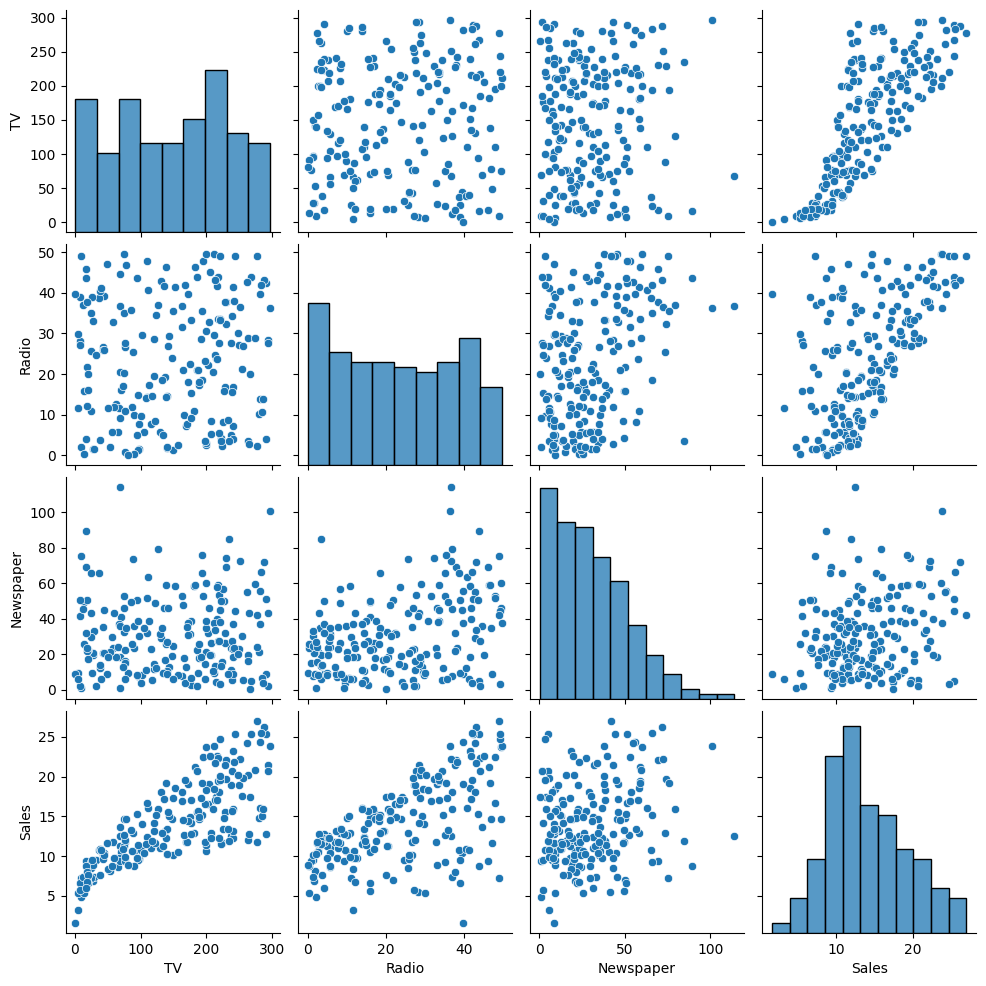

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

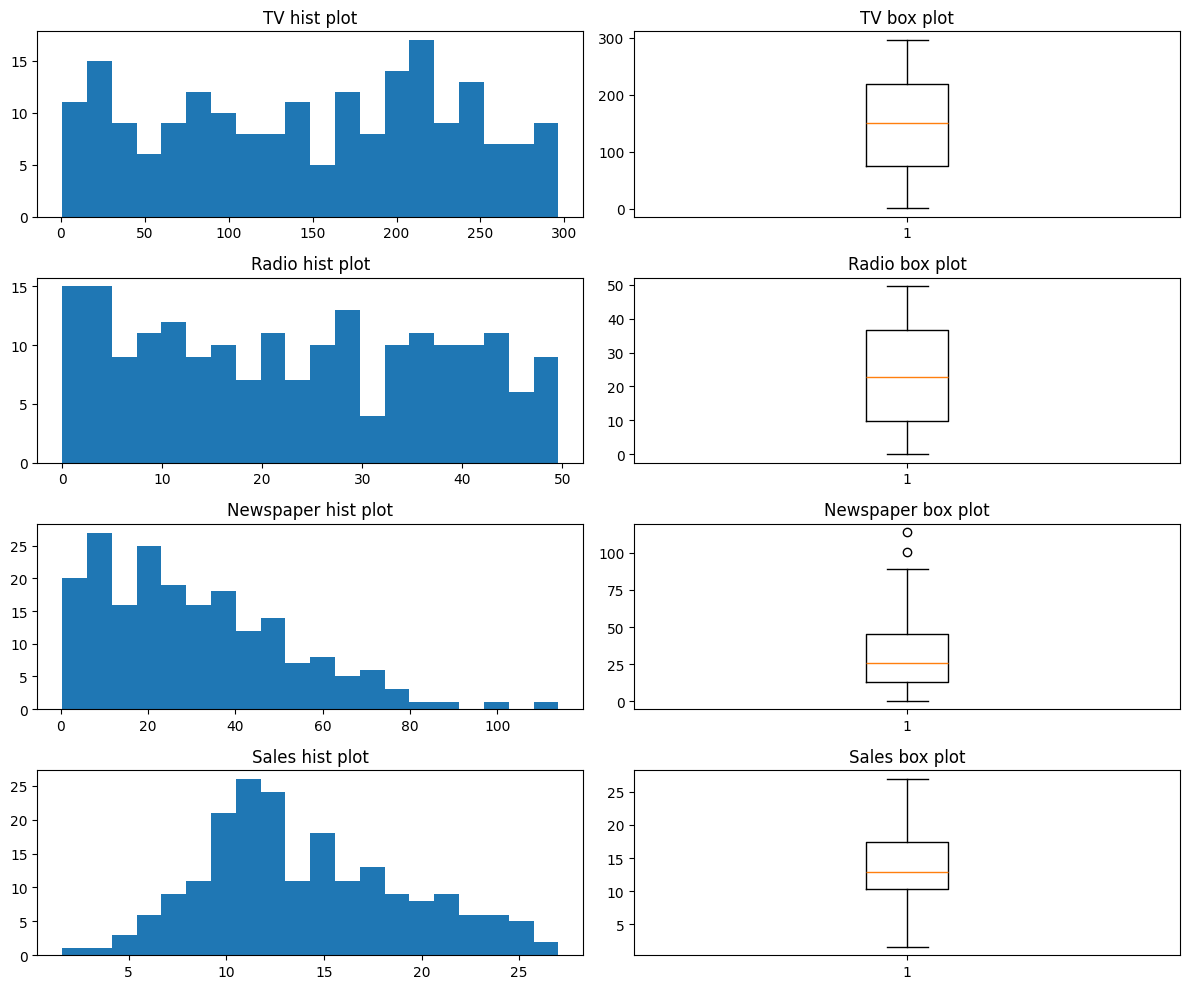

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
plt.hist(df['TV'], bins=20)
plt.title("TV hist plot")

plt.subplot(4, 2, 2)
plt.boxplot(df['TV'])
plt.title("TV box plot")

plt.subplot(4, 2, 3)
plt.hist(df['Radio'], bins=20)
plt.title("Radio hist plot")

plt.subplot(4, 2, 4)
plt.boxplot(df['Radio'])
plt.title("Radio box plot")

plt.subplot(4, 2, 5)
plt.hist(df['Newspaper'], bins=20)
plt.title("Newspaper hist plot")

plt.subplot(4, 2, 6)
plt.boxplot(df['Newspaper'])
plt.title("Newspaper box plot")

plt.subplot(4, 2, 7)
plt.hist(df['Sales'], bins=20)
plt.title("Sales hist plot")

plt.subplot(4, 2, 8)  # Corrected subplot position
plt.boxplot(df['Sales'])
plt.title("Sales box plot")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
#step-1 : calculate q1 and q3
for i in df:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)

    #step-2:calcule IQR=q3-q1
    IQR=q3-q1

    #step-3:lb=q1-1.5*IQR
    lb=q1-1.5*IQR

    #step-4:ub=q3+1.5*IQR
    ub=q3+1.5*IQR

    #step-5:con1=data<lb
    con1=df[i]<lb

    #step-6:con2=data>ub
    con2=df[i]>ub

    #step-7:con3=con1<or(|)>con2
    con3=con1 | con2
    #step-8:data[con3]
    count=len(df[con3]) #427
    print(f"outlier data {i} is {count}")

outlier data TV is 0
outlier data Radio is 0
outlier data Newspaper is 2
outlier data Sales is 0


In [ ]:
#step-1 : calculate q1 and q3
for i in df:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)

    #step-2:calcule IQR=q3-q1
    IQR=q3-q1

    #step-3:lb=q1-1.5*IQR
    lb=q1-1.5*IQR

    #step-4:ub=q3+1.5*IQR
    ub=q3+1.5*IQR

    #step-5:con1=data<lb
    con1=df[i]>lb

    #step-6:con2=data>ub
    con2=df[i]<ub

    #step-7:con3=con1<or(|)>con2
    con3=con1 & con2

    #step-8:data[con3]
    count=len(df[con3])
    print(f"non outlier data {i} is {count}")

non outlier data TV is 200
non outlier data Radio is 200
non outlier data Newspaper is 198
non outlier data Sales is 200


In [ ]:
#step-1 : calculate q1 and q3
q1=np.quantile(df['Newspaper'],0.25)
q3=np.quantile(df['Newspaper'],0.75)

#step-2:calcule IQR=q3-q1
IQR=q3-q1

#step-3:lb=q1-1.5*IQR
lb=q1-1.5*IQR

#step-4:ub=q3+1.5*IQR
ub=q3+1.5*IQR

median=df['Newspaper'].median()

#####################################################

new_data=[]
data=df['Newspaper']
for i in data:
    if i<lb or i>ub:
        new_data.append(median)
    else:
        new_data.append(i)
df['Newspaper']=new_data

In [ ]:
#step-1 : calculate q1 and q3
for i in df:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)

    #step-2:calcule IQR=q3-q1
    IQR=q3-q1

    #step-3:lb=q1-1.5*IQR
    lb=q1-1.5*IQR

    #step-4:ub=q3+1.5*IQR
    ub=q3+1.5*IQR

    #step-5:con1=data<lb
    con1=df[i]>lb

    #step-6:con2=data>ub
    con2=df[i]<ub

    #step-7:con3=con1<or(|)>con2
    con3=con1 & con2

    #step-8:data[con3]
    count=len(df[con3]) #427
    print(f"non outlier data {i} is {count}")

non outlier data TV is 200
non outlier data Radio is 200
non outlier data Newspaper is 200
non outlier data Sales is 200


Text(0.5, 1.0, 'Newspaper box plot')

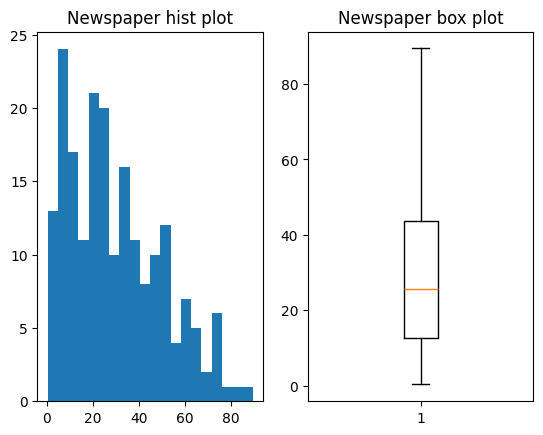

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(df['Newspaper'], bins=20)
plt.title("Newspaper hist plot")

plt.subplot(1, 2, 2)
plt.boxplot(df['Newspaper'])
plt.title("Newspaper box plot")

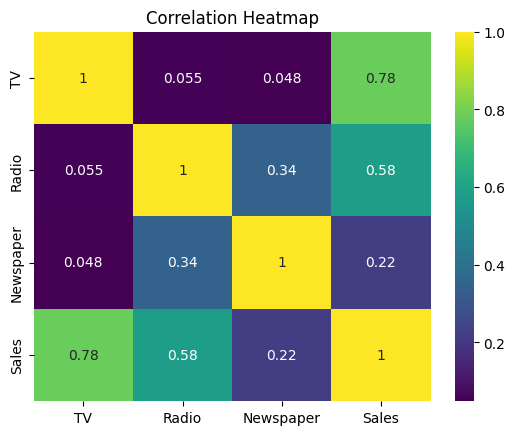

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X=df.drop('Sales',axis=1)
data=pd.DataFrame()
data['features']=X.columns
data['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
data

,features,vif
0,TV,2.510799
1,Radio,3.292691
2,Newspaper,3.125068


In [ ]:
ss=StandardScaler()
scaled_data=ss.fit_transform(df.drop('Sales',axis=1))
scaled_data

array([[ 9.69852266e-01,  9.81522472e-01,  1.94434144e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.56934788e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.94926844e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.41715259e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.41222560e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.23010735e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.07296900e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.93609727e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.41587157e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.20617866e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.72807910e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.26806162e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.78175049e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.11039766e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.01277775e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.14124067e+00],
       [-9.25304978e-01,  9.00494200e-01

In [ ]:
#Creating a Scaled DataFrame
scaled_df=pd.DataFrame()
scaled_df[X.columns]=scaled_data
scaled_df['Sales']=df['Sales']
scaled_df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.944341,22.1
1,-1.197376,1.082808,0.756935,10.4
2,-1.516155,1.528463,1.949268,9.3
3,0.052050,1.217855,1.417153,18.5
4,0.394182,-0.841614,1.412226,12.9


In [ ]:
# Define features and target variable
X=scaled_df.drop('Sales',axis=1)
y=scaled_df['Sales']

In [ ]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((160, 3), (160,), (40, 3), (40,))

In [ ]:
# Initialize and train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred=model.predict(X_test)


In [ ]:
# Calculate prediction accuracy
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE is:{mse}")
print(f"r2_r2_score is:{r2}")

MSE is:3.1581240391626877
r2_r2_score is:0.8999440917857242
